In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import polars as pl
import networkx as nx

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network
from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)
import torch

In [2]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [3]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=100,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

/home/lubojjan/DiplomaThesis2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-13 17:12:11,574] A new study created in memory with name: no-name-d733b459-f2aa-4e0e-adba-54871908ba91
[I 2024-12-13 17:12:11,885] Trial 0 finished with value: 0.5494098662052023 and parameters: {'booster': 'dart', 'lambda': 0.0034458009633895866, 'alpha': 0.0023296689443452353, 'max_depth': 8, 'eta': 0.09367492643423031, 'gamma': 9.809120948342486e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.5665214740647833e-08, 'skip_drop': 0.35871148778172185}. Best is trial 0 with value: 0.5494098662052023.
[I 2024-12-13 17:12:12,052] Trial 1 finished with value: 0.8523939840000002 and parameters: {'booster': 'gblinear', 'lambda': 0.003667925184596635, 'alpha': 1.7583

New best score: 0.549
Best model performance:
Accuracy: 0.879 ± 0.049
F1 Macro: 0.725 ± 0.159
F1 Weighted: 0.862 ± 0.062
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.4444444444444444), 'f1_weighted': np.float64(0.7703703703703704)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]
New best score: 0.852
Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.93

[I 2024-12-13 17:12:12,274] Trial 2 finished with value: 0.4658631883959173 and parameters: {'booster': 'dart', 'lambda': 8.247490583393079e-07, 'alpha': 0.0011330971797135533, 'max_depth': 2, 'eta': 1.0976111169694787e-05, 'gamma': 5.188365719765506e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.6717642492997047e-05, 'skip_drop': 0.00018940187182766574}. Best is trial 1 with value: 0.8523939840000002.
[I 2024-12-13 17:12:12,489] Trial 3 finished with value: 0.585901803069261 and parameters: {'booster': 'gbtree', 'lambda': 0.0002800422762173816, 'alpha': 0.7230099560523107, 'max_depth': 3, 'eta': 0.6042665576506903, 'gamma': 5.100264311487305e-07, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8523939840000002.
[I 2024-12-13 17:12:12,725] Trial 4 finished with value: 0.585901803069261 and parameters: {'booster': 'dart', 'lambda': 0.08473142888659158, 'alpha': 0.022233212688400197, 'max_depth': 3, 'eta': 0.3983399196602

Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.003667925184596635, 'alpha': 1.7583634230047018e-07}


In [4]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.06864002346992493, -0.06755167990922928], 'ENSG00000278588': [0.04556375741958618, -0.046564098447561264], 'ENSG00000120594': [0.03221268579363823, -0.040854696184396744], 'ENSG00000121797': [-0.05287269130349159, 0.05131477862596512], 'ENSG00000140398': [0.057392627000808716, -0.058508872985839844], 'ENSG00000168062': [-0.06842167675495148, 0.06074196845293045], 'ENSG00000174307': [-0.06777846068143845, 0.06887833774089813], 'ENSG00000184897': [0.041230279952287674, -0.042614758014678955], 'ENSG00000105497': [-0.04891142621636391, 0.05017466098070145], 'ENSG00000113552': [-0.06455961614847183, 0.06305753439664841], 'ENSG00000188536': [-0.06259176880121231, 0.05900643765926361], 'ENSG00000181004': [-0.04416390508413315, 0.044892534613609314], 'ENSG00000143590': [-0.07007025182247162, 0.06713296473026276], 'ENSG00000006534': [-0.05637316033244133, 0.056242749094963074], 'EN

In [5]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

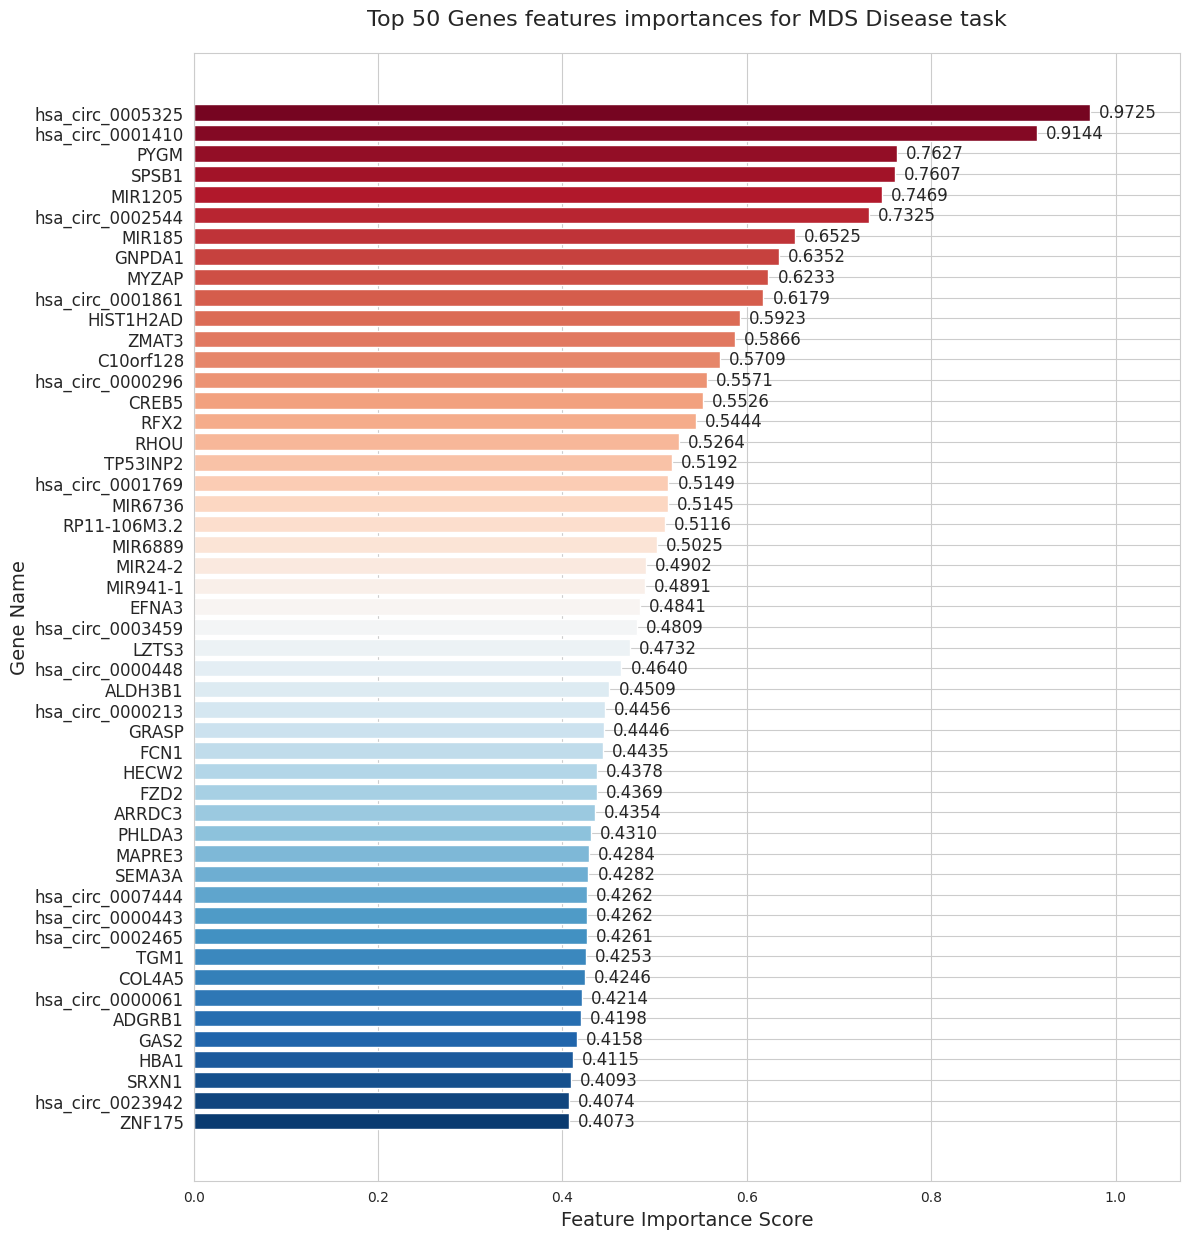

In [6]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top 50 Genes features importances for MDS Disease task", save_file="plots/disease/feature_importance_genes.png")

- [hsa_circ_0005325 significantly upregulated in colorectal cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC10952939/)
- []()

In [7]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

print(mrna_dict['CD79B'])

# keep only top 30 out of each list
n_top_genes = 60
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

0.05162219423800707


In [8]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(42), tensor(42.), tensor(17.))

7373


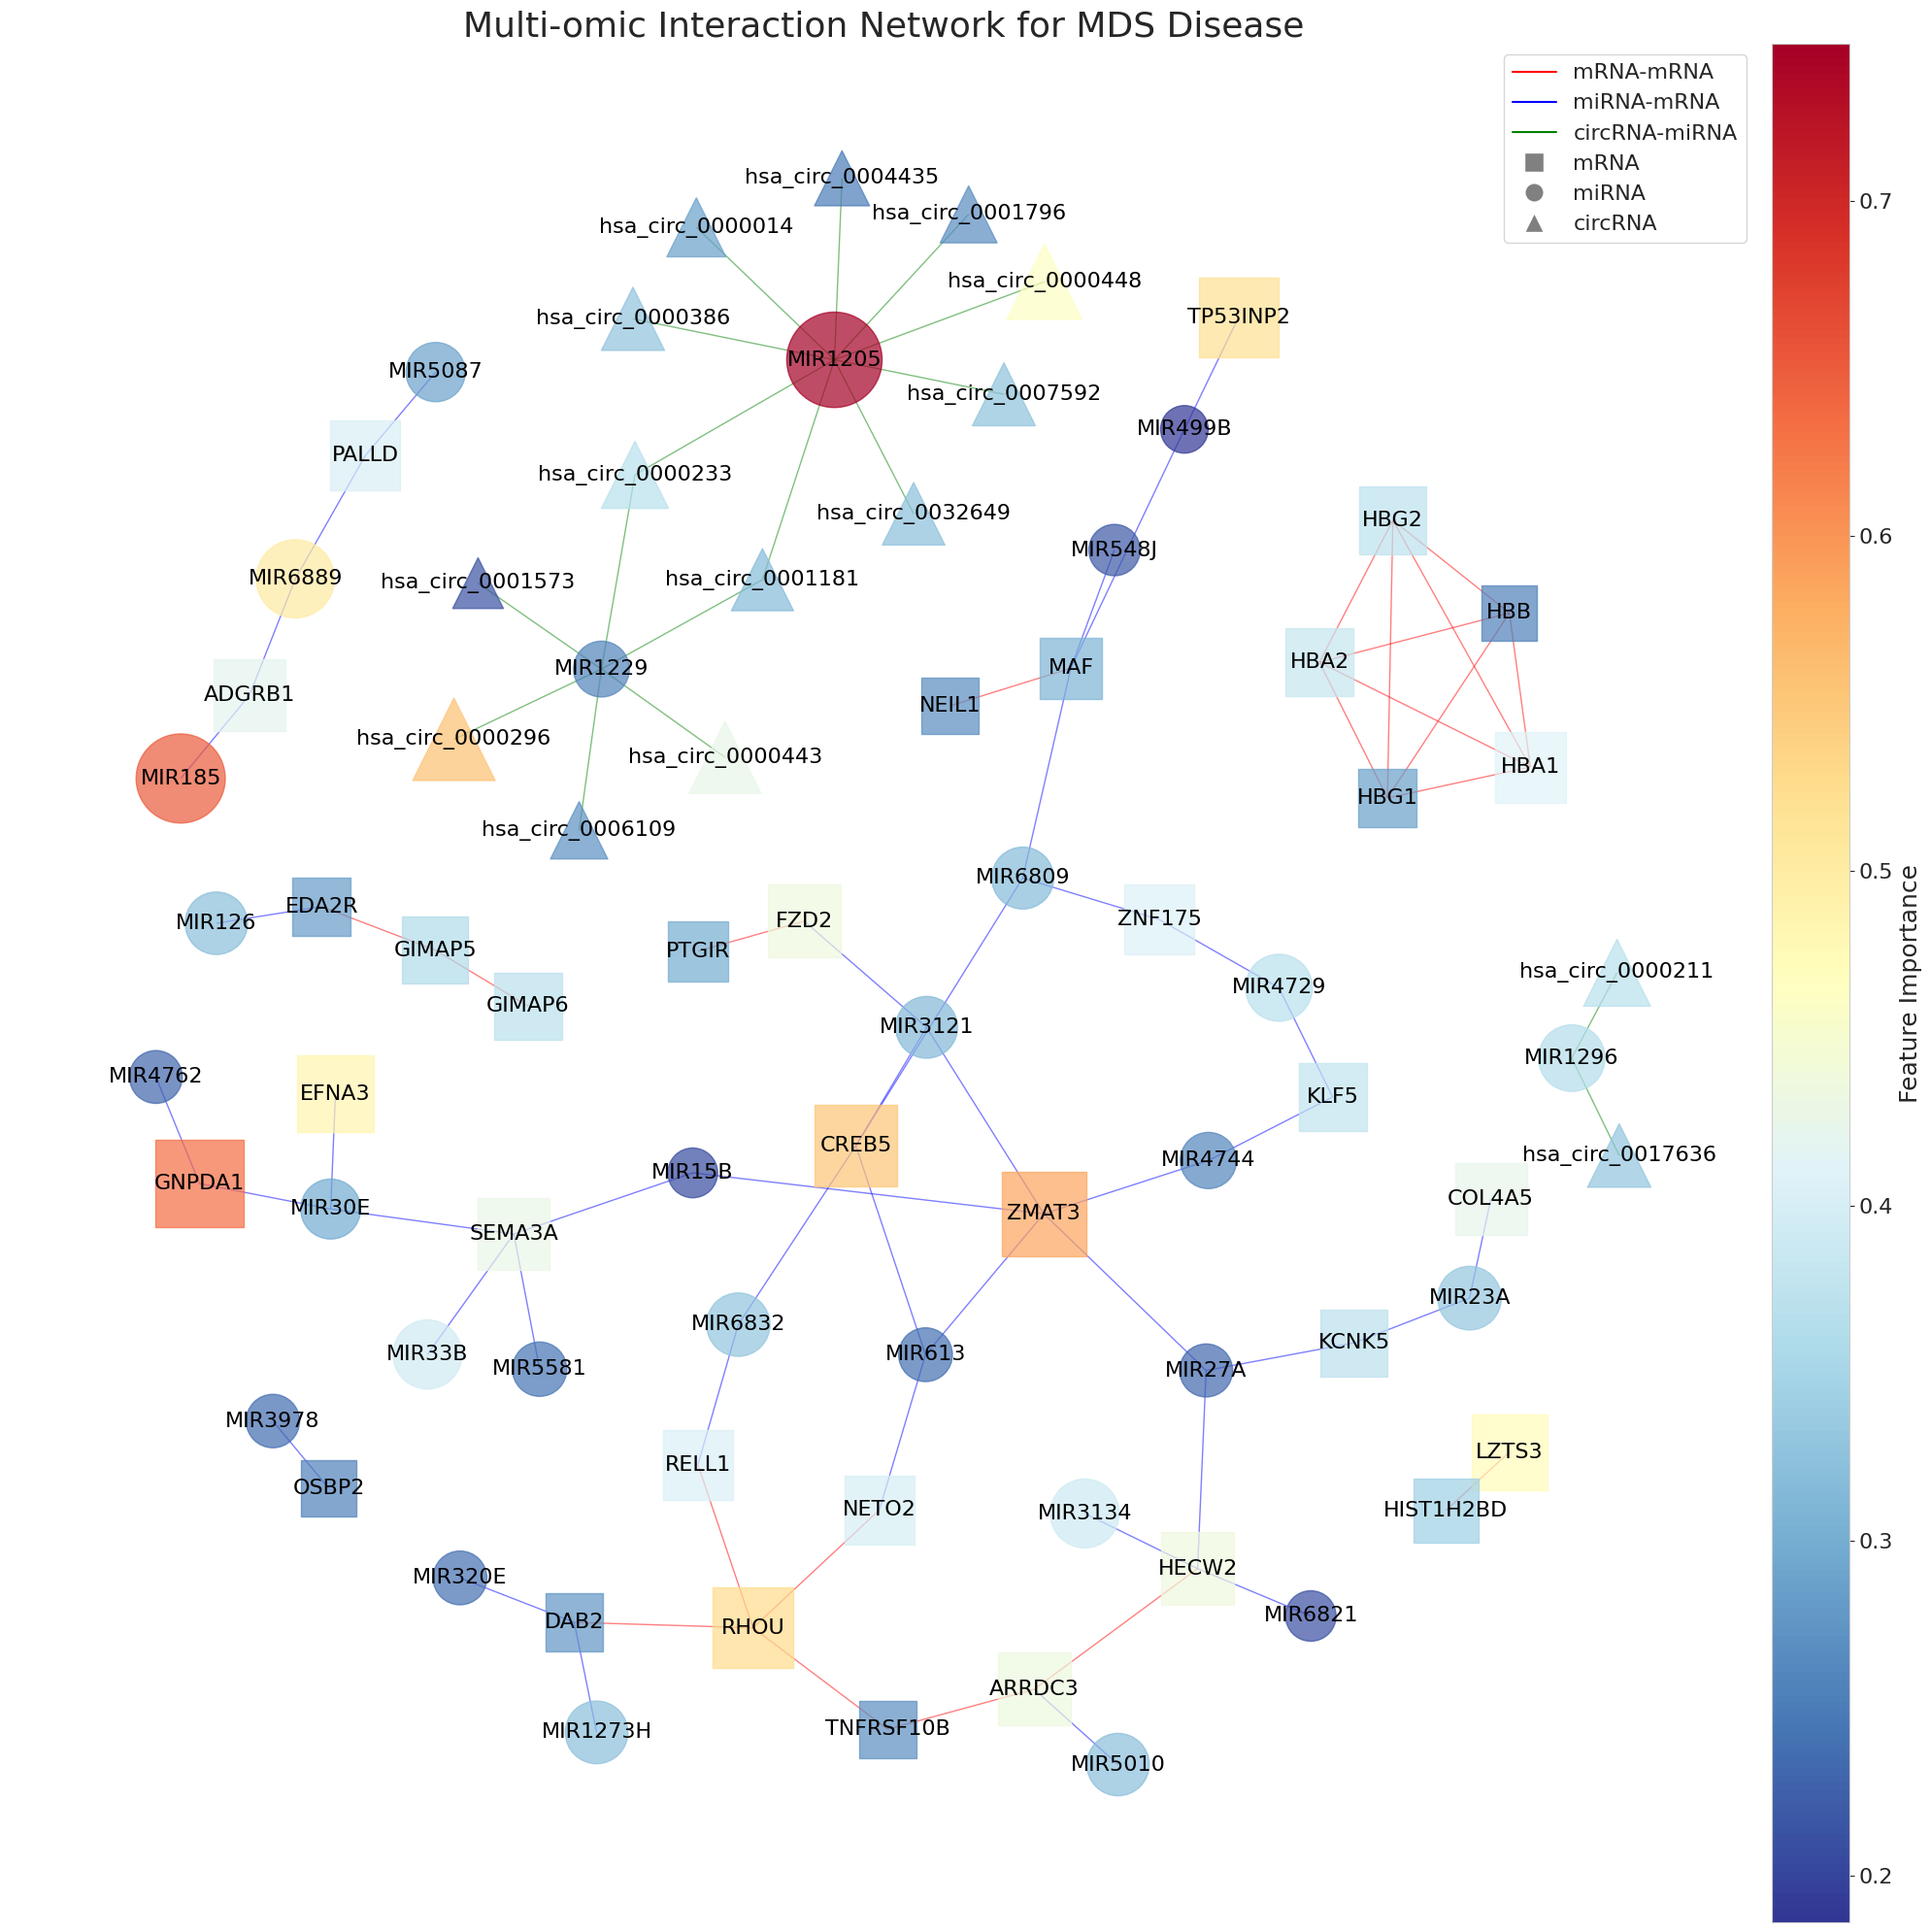

In [9]:
# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# we can also save graph for cytoscape
# nx.write_graphml(G, "plots/disease/disease_multi_omic_network.graphml")

# generate a random number
seed = np.random.randint(0, 10000)
print(seed)

fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Multi-omic Interaction Network for MDS Disease",
    figsize=(20,20),
    max_iter=500,
    gravity=1.0,
    jitter_tolerance=2.0,
)
# plt.show()
fig.savefig('plots/disease/disease_multi_omic_network_genes_pnly.png', dpi=100)

- [MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)
- MIR1205 has been implicated to serve a function in other types of cancer https://www.nature.com/articles/s41419-019-2154-4, as a tumor suppressor in lung cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC6405972/, breast cancer https://www.sciencedirect.com/science/article/abs/pii/S0898656824002328, gastric cancer https://www.sciencedirect.com/science/article/pii/S2162253120301335
- has_circr_0000489 reported upregulated in liver cancer https://turkjgastroenterol.org/Content/files/sayilar/391/TJG_April_2023%20(1)-92-104.pdf
- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/), RELL1 identified as an oncogene in glioma cancer https://pubmed.ncbi.nlm.nih.gov/32683297/, RELT protein expression was detected in the spleen, lymph node, brain, breast and peripheral blood leukocytes (PBLs). A smaller than expected size of RELT was observed in PBLs, suggesting a proteolytically cleaved form of RELT.
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)
- hsa_circr_0005325 implicated to serve a function in cervical cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC9884480/, bladder cancer, and AML https://www.researchgate.net/publication/370139513_A_Bioinformatics_Analysis_of_circRNAmiRNAmRNA_Interactions_in_Acute_Myeloid_Leukemia
- [CREB5 identified as biomarker in multiple types of cancer including AML](https://www.sciencedirect.com/science/article/pii/S0010482524003913), [CREB5 glioma cancer](https://www.nature.com/articles/s41420-024-01873-z), [CREB5 in hepatocellular cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC6962929/)
- [GNPDA1 leads to poor prognosis in hepatocellular carcinoma](https://pubmed.ncbi.nlm.nih.gov/32606980/), and in [kidney cancer](https://www.proteinatlas.org/ENSG00000113552-GNPDA1) 
- [Decreased expression of HBA1 and HBB genes in acute myeloid leukemia patients and their inhibitory effects on growth of K562 cells](https://pubmed.ncbi.nlm.nih.gov/36117408/)

[ARRDC3 is a biomarker in cancers including AML](https://pmc.ncbi.nlm.nih.gov/articles/PMC9127825/)

In [10]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)
# significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"])

# with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
#     print(significant_results)

significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results.head(15))

shape: (15, 4)
+-----------------------------+-----------------------------------------------------------------------+------------------+-----------------------------------------------------------------------------+
| Gene_set                    | Term                                                                  | Adjusted P-value | Genes                                                                       |
| ---                         | ---                                                                   | ---              | ---                                                                         |
| str                         | str                                                                   | f64              | str                                                                         |
+====================================================================================================================================================================================

| Gene_set | Term | Adjusted P-value | Genes |
|-----------|------|-----------------|--------|
| Elsevier_Pathway_Collection | Hematopoietic Cell Lineage: B-cell (mouse) | 9.4219e-7 | CD79B;CD79A;VPREB1;IGLL1;CD19;EBF1;DNTT;PAX5;RAG2;CD24;RAG1 |
| Elsevier_Pathway_Collection | Hematopoietic Cell Lineage: B-cell | 9.4219e-7 | CD79B;CD79A;VPREB1;MME;IGLL1;CD19;EBF1;CXCR4;PAX5;CD24 |
| BioPlanet_2019 | Oxygen/carbon dioxide exchange in erythrocytes | 0.000093 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| Reactome_Pathways_2024 | Erythrocytes Take up Oxygen and Release Carbon Dioxide | 0.000106 | HBB;RHAG;SLC4A1;HBA1;AQP1 | 
| Reactome_Pathways_2024 | O2 CO2 Exchange in Erythrocytes | 0.000467 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| Reactome_Pathways_2024 | Erythrocytes Take up Carbon Dioxide and Release Oxygen | 0.000467 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| BioPlanet_2019 | Alpha-hemoglobin stabilizing enzyme (AHSP) pathway | 0.00098 | ALAS2;CPOX;HBB;HBA2;HBA1 |
| BioPlanet_2019 | Systemic lupus erythematosus | 0.004273 | HIST1H2AM;C1QB;HLA-DRB5;HIST1H4A;C7;H3F3B;HIST1H2BI;HIST1H2AD;HIST1H4H;HLA-DOA;HIST1H2BD;HIST1H3D |
| WikiPathways_2024_Human | Extrafollicular And Follicular B Cell Activation By SARS CoV 2 WP5218 | 0.005947 | CD79A;MAF;IRF4;CD19;CXCR4;PAX5;CD1D;BACH2;FOXO1 |
| BioPlanet_2019 | Primary immunodeficiency | 0.0085 | CD79A;IGLL1;CD19;TNFRSF13C;RAG2;RAG1 |
| Elsevier_Pathway_Collection | Proerythroblast -> Erythrocyte Surface Expression Markers | 0.01121 | P2RY13;GYPA;SEMA7A;P2RY1;HBB;SLC4A1;AQP1 |
| Elsevier_Pathway_Collection | V(D)J Recombination Activation | 0.01121 | LEF1;EBF1;PAX5;RAG2;FOXO1;RAG1 |
| Elsevier_Pathway_Collection | T-Cell Independent B-Cell Activation | 0.015821 | CD79B;CD79A;CD19;TNFRSF13C;PAX5;RAG2;RAG1 |
| Elsevier_Pathway_Collection | Proteins Involved in Diabetes Mellitus Type 1 | 0.015821 | CD274;COL18A1;HLA-DRB5;SOCS1;SERPINA1;VDR;SLC11A1;TNFSF10;FAS |
| Elsevier_Pathway_Collection | Mucosa-Associated Lymphoid Tissue (MALT) Lymphoma | 0.015821 | CD79B;CD79A;IRF4;TNFAIP3;CXCR4;FAS;TLR6 |

In [11]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=[
        "GO_Biological_Process_2023",
        "GO_Molecular_Function_2023",
        "GO_Cellular_Component_2023",
        # "Jensen_DISEASES",
        # "Human_Phenotype_Ontology"
    ],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)

significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (5, 4)
+----------------------------+----------------------------------------------+------------------+--------------------------------+
| Gene_set                   | Term                                         | Adjusted P-value | Genes                          |
| ---                        | ---                                          | ---              | ---                            |
| str                        | str                                          | f64              | str                            |
+===============================================================================================================================+
| GO_Biological_Process_2023 | Gas Transport (GO:0015669)                   | 0.000462         | HBG2;HBG1;HBB;RHAG;HBA1;CYGB   |
|----------------------------+----------------------------------------------+------------------+--------------------------------|
| GO_Biological_Process_2023 | Carbon Dioxide Transport (GO:0015670)        

In [20]:
list(mrna_dict.keys())[:60]

['PYGM',
 'SPSB1',
 'GNPDA1',
 'MYZAP',
 'HIST1H2AD',
 'ZMAT3',
 'C10orf128',
 'CREB5',
 'RFX2',
 'RHOU',
 'TP53INP2',
 'RP11-106M3.2',
 'EFNA3',
 'LZTS3',
 'ALDH3B1',
 'GRASP',
 'FCN1',
 'HECW2',
 'FZD2',
 'ARRDC3',
 'PHLDA3',
 'MAPRE3',
 'SEMA3A',
 'TGM1',
 'COL4A5',
 'ADGRB1',
 'GAS2',
 'HBA1',
 'SRXN1',
 'ZNF175',
 'RELL1',
 'PALLD',
 'NETO2',
 'HBA2',
 'KLF5',
 'HBG2',
 'KCNK5',
 'GIMAP6',
 'BATF2',
 'CCRL2',
 'GIMAP5',
 'HIST1H2BD',
 'unknown_id_30',
 'POMC',
 'MAF',
 'DHRS9',
 'PTGIR',
 'BBS12',
 'HBG1',
 'NR4A3',
 'EDA2R',
 'DAB2',
 'TNFRSF10B',
 'NEIL1',
 'CTD-2643I7.4',
 'HLA-DOA',
 'H1FX',
 'HBB',
 'OSBP2',
 'RGPD2']